<a href="https://colab.research.google.com/github/ErickQ29/Just-a-normal-rep/blob/main/Pharmaceutical_Treatment_Analysis_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First of all, I'm going to call the libreries in R (ggplot, tidyverse and sqlite for r) and see if they're okay.

In [3]:
install.packages("RSQLite")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plogr’




In [6]:
library(tidyverse)
library(ggplot2)
library(RSQLite)
cat(" Okay 👍")

 Okay 👍

So... First, what do i have?
I'm goonna upload the csv I find in Kaggle called: 1000 drugs and side effects. Which contains information on 1,000 real-world pharmaceutical drugs. It includes key details such as drug names, categories, chemical formulas, dosage forms, mechanisms of action, therapeutic uses, side effects, and manufacturer information.

You can find it by click in the following link:https://www.kaggle.com/datasets/palakjain9/1000-drugs-and-side-effects


Before touching anything, I need to see the shape of my data. Like a doctor with an X-ray, I'm looking for symptoms: missing data, duplicates, strange values. With glimpse(), I can see the entire skeleton at a glance.


In [10]:
df <- read.csv("real_drug_dataset.csv")

cat("\n First Look \n\n")
cat("Shape: ", dim(df), "(rows,columns)\n")
cat("Columns: ", names(df), "\n")

cat(" Data type ")
glimpse(df)

cat(" Descriptive stadistics ")
summary(df)

cat(" Quiality verification: \n\n")
cat("IDs Duplicated: ", sum(duplicated(df$Patient_ID)), "\n")

cat("Missing values:", sum(is.na(df)), "\n")


 First Look 

Shape:  1000 9 (rows,columns)
Columns:  Patient_ID Age Gender Condition Drug_Name Dosage_mg Treatment_Duration_days Side_Effects Improvement_Score 
 Data type Rows: 1,000
Columns: 9
$ Patient_ID              <chr> "P0001", "P0002", "P0003", "P0004", "P0005", "…
$ Age                     <int> 56, 69, 46, 32, 60, 25, 78, 38, 56, 75, 36, 40…
$ Gender                  <chr> "Male", "Male", "Female", "Male", "Male", "Fem…
$ Condition               <chr> "Infection", "Hypertension", "Depression", "Di…
$ Drug_Name               <chr> "Ciprofloxacin", "Metoprolol", "Bupropion", "G…
$ Dosage_mg               <int> 50, 500, 100, 850, 850, 850, 250, 100, 850, 85…
$ Treatment_Duration_days <int> 9, 24, 25, 44, 35, 50, 40, 15, 56, 19, 23, 11,…
$ Side_Effects            <chr> "Nausea", "Tiredness", "Dry mouth", "Low blood…
$ Improvement_Score       <dbl> 8.5, 8.7, 5.4, 6.4, 5.3, 6.7, 6.5, 8.2, 9.0, 9…
 Descriptive stadistics 

  Patient_ID             Age           Gender           Condition        
 Length:1000        Min.   :18.00   Length:1000        Length:1000       
 Class :character   1st Qu.:35.00   Class :character   Class :character  
 Mode  :character   Median :50.00   Mode  :character   Mode  :character  
                    Mean   :49.86                                        
                    3rd Qu.:66.00                                        
                    Max.   :79.00                                        
  Drug_Name           Dosage_mg     Treatment_Duration_days Side_Effects      
 Length:1000        Min.   : 50.0   Min.   : 5.00           Length:1000       
 Class :character   1st Qu.:100.0   1st Qu.:19.00           Class :character  
 Mode  :character   Median :250.0   Median :32.00           Mode  :character  
                    Mean   :352.6   Mean   :32.38                             
                    3rd Qu.:500.0   3rd Qu.:46.00                             
        

 Quiality verification: 

IDs Duplicated:  0 
Missing values: 0 


After uploading the file, you can re-run the cell with `read.csv`.

# Cleaning (cooking)

A chef does not cook with dirty ingredients. I find that “Male” and “Female” are well balanced. The doses of 50-850mg are realistic. There are no missing values, which is a luxury. With mutate(across(...)) I clean the entire text at once gng.

In [14]:
cat("\n\n")
cat( "cleaning in course ")
cat("\n\n")
cat("Unique genders")
print(table(df$Gender))

cat(" Unique conditions\n")
print(table(df$Condition))

cat("\nAge ranges:", min(df$Age), "-", max(df$Age), "years\n")
cat("Dosage range:", min(df$Dosage_mg), "-", max(df$Dosage_mg), "mg\n")

df <- df %>%
  mutate(across(where(is.character), str_trim))
cat("\nOut of range scores (0-10):",
    sum(df$Improvement_Score < 0 | df$Improvement_Score > 10), "\n\n")
    cat(" Data cleaned brou ")



cleaning in course 

Unique genders
Female   Male 
   477    523 
 Unique conditions

  Depression     Diabetes Hypertension    Infection  Pain Relief 
         176          207          194          215          208 

Age ranges: 18 - 79 years
Dosage range: 50 - 850 mg

Out of range scores (0-10): 0 

 Data cleaned brou 

# Exploratory Data Analysis (EDA)

With ggplot2, I build visual stories. The boxplot shows me not only the median, but also the variability. Is escitalopram really better, or does it just have less data? With reorder(), I automatically sort by median to see the clear ranking.

Making graphs...


Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


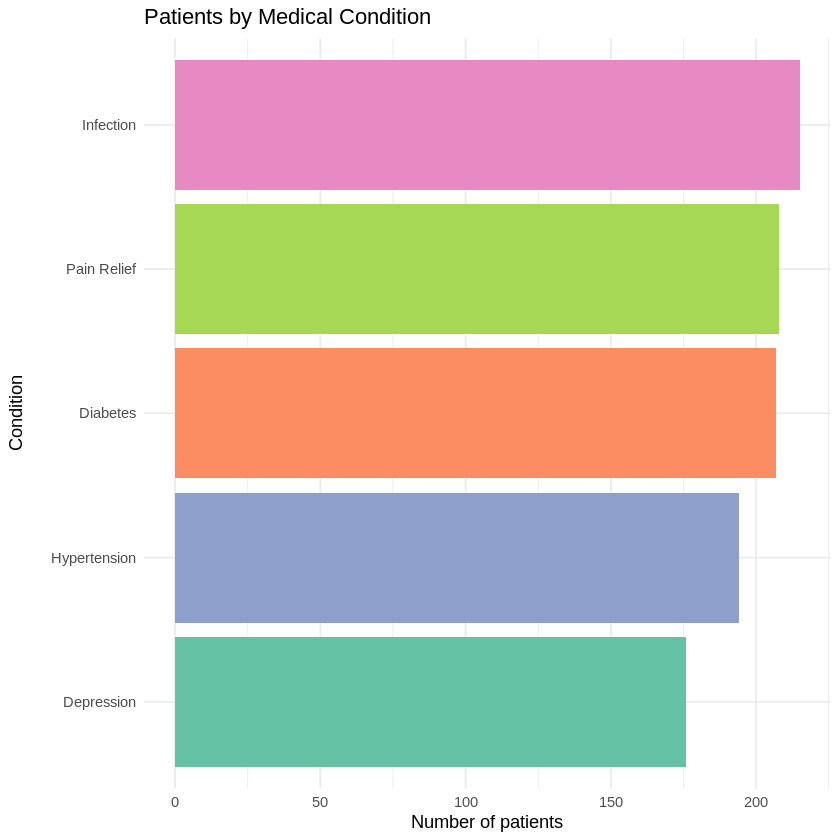


 Most effective medicaments (average):
# A tibble: 15 × 2
   Drug_Name        promedio_mejora
   <chr>                      <dbl>
 1 Insulin Glargine            7.21
 2 Amoxicillin                 7.17
 3 Losartan                    7.13
 4 Bupropion                   7.11
 5 Paracetamol                 7.08
 6 Escitalopram                7.07
 7 Sertraline                  7.04
 8 Glipizide                   7.04
 9 Metformin                   7.03
10 Azithromycin                7.00
11 Ciprofloxacin               6.90
12 Ibuprofen                   6.89
13 Tramadol                    6.88
14 Metoprolol                  6.88
15 Amlodipine                  6.83


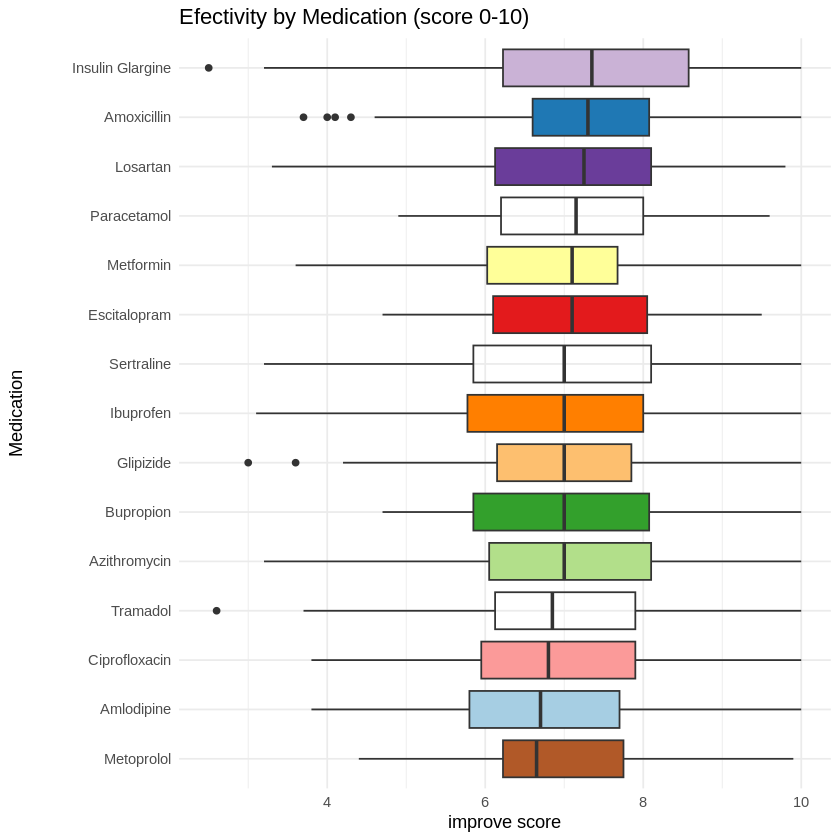

In [16]:
theme_set(theme_minimal())

# Create directory if needed
if (!dir.exists("plots")) dir.create("plots")

cat("Making graphs...\n")

p1 <- df %>%
  count(Condition, sort = TRUE) %>%
  ggplot(aes(x = reorder(Condition, n), y = n, fill = Condition)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Patients by Medical Condition",
       x = "Condition", y = "Number of patients") +
  scale_fill_brewer(palette = "Set2") +
  theme(legend.position = "none")

ggsave("plots/condition_distribution.png", p1, width = 10, height = 6)
print(p1)

p2 <- df %>%
  ggplot(aes(x = reorder(Drug_Name, Improvement_Score, median),
             y = Improvement_Score, fill = Drug_Name)) +
  geom_boxplot() +
  coord_flip() +
  labs(title = "Efectivity by Medication (score 0-10)",
       x = "Medication", y = "improve score") +
  scale_fill_brewer(palette = "Paired") +
  theme(legend.position = "none")

ggsave("plots/drug_effectiveness.png", p2, width = 12, height = 8)
print(p2)

cat("\n Most effective medicaments (average):\n")
df %>%
  group_by(Drug_Name) %>%
  summarise(promedio_mejora = mean(Improvement_Score, na.rm = TRUE)) %>%
  arrange(desc(promedio_mejora)) %>%
  print()


# Creating new columns for better insights

With case_when(), I build logical groups. A 45-year-old patient is not the same as a 75-year-old patient. The duration of treatment matters: 5 days vs. 60 days is a different story. With %in%, I automatically identify the most common effects.

In [18]:
# Yuh
cat("🔧 MAKING NEW VARIABLES...\n")

df <- df %>%
  mutate(
    # Groups by age
    Age_Group = case_when(
      Age <= 30 ~ "Young",
      Age <= 50 ~ "Adult",
      Age <= 70 ~ "Old",
      TRUE ~ "Geriatry"
    ),

    # Duration Categories
    Treatment_Category = case_when(
      Treatment_Duration_days <= 15 ~ "Short",
      Treatment_Duration_days <= 30 ~ "Mid",
      Treatment_Duration_days <= 50 ~ "Large",
      TRUE ~ "Very Large"
    ),

    # High dose vs low dose
    Is_High_Dose = Dosage_mg > median(Dosage_mg),

    # Common side effects
    Has_Common_Side_Effect = Side_Effects %in%
      df$Side_Effects %>%
      table() %>%
      sort(decreasing = TRUE) %>%
      names() %>%
      head(5)
  )

cat("New columns created 👍:\n")
glimpse(df)

🔧 MAKING NEW VARIABLES...
New columns created 👍:
Rows: 1,000
Columns: 13
$ Patient_ID              <chr> "P0001", "P0002", "P0003", "P0004", "P0005", "…
$ Age                     <int> 56, 69, 46, 32, 60, 25, 78, 38, 56, 75, 36, 40…
$ Gender                  <chr> "Male", "Male", "Female", "Male", "Male", "Fem…
$ Condition               <chr> "Infection", "Hypertension", "Depression", "Di…
$ Drug_Name               <chr> "Ciprofloxacin", "Metoprolol", "Bupropion", "G…
$ Dosage_mg               <int> 50, 500, 100, 850, 850, 850, 250, 100, 850, 85…
$ Treatment_Duration_days <int> 9, 24, 25, 44, 35, 50, 40, 15, 56, 19, 23, 11,…
$ Side_Effects            <chr> "Nausea", "Tiredness", "Dry mouth", "Low blood…
$ Improvement_Score       <dbl> 8.5, 8.7, 5.4, 6.4, 5.3, 6.7, 6.5, 8.2, 9.0, 9…
$ Age_Group               <chr> "Old", "Old", "Adult", "Adult", "Old", "Young"…
$ Treatment_Category      <chr> "Short", "Mid", "Mid", "Large", "Large", "Larg…
$ Is_High_Dose            <lgl> FALSE, TRUE, FA

In [19]:
dir.create("drug-analysis-project", showWarnings = FALSE)
dir.create("drug-analysis-project/data", showWarnings = FALSE)
dir.create("drug-analysis-project/data/raw", showWarnings = FALSE)
dir.create("drug-analysis-project/data/processed", showWarnings = FALSE)
dir.create("drug-analysis-project/notebooks", showWarnings = FALSE)
dir.create("drug-analysis-project/plots", showWarnings = FALSE)
dir.create("drug-analysis-project/sql", showWarnings = FALSE)

cat("uwu")

uwu

In [20]:
write_csv(df, "drug-analysis-project/data/processed/drug_data_clean.csv")

df_diabetes <- df %>% filter(Condition == "Diabetes")
write_csv(df_diabetes, "drug-analysis-project/data/processed/diabetes_subset.csv")

cat("uwu (data saved in data/processed)\n")

uwu (data saved in data/processed)


# SQL analysis with R
SQL is the universal language of data. With RSQLite, I create a real database. The first query searches for the “holy grail”: high effectiveness with few side effects. The second is a pharmacovigilance safety report.

In [22]:
con <- dbConnect(RSQLite::SQLite(), "drug-analysis-project/data/drug_database.db")

dbWriteTable(con, "treatments", df, overwrite = TRUE)


In [36]:
database_directory <- "drug-analysis-project/data"
if (!dir.exists(database_directory)) dir.create(database_directory, recursive = TRUE)

database_path <- file.path(database_directory, "drug_database.db")
if (!exists("con") || !dbIsValid(con)) con <- dbConnect(SQLite(), database_path)

dbWriteTable(con, "treatments", df, overwrite = TRUE)

query_1 <- "
SELECT
    Drug_Name,
    AVG(Improvement_Score) AS average_improvement,
    COUNT(DISTINCT Side_Effects) AS unique_side_effects,
    AVG(Improvement_Score) / COUNT(DISTINCT Side_Effects) AS ratio
FROM treatments
GROUP BY Drug_Name
ORDER BY ratio DESC
LIMIT 5
"

cat("\n EFFECTIVENESS/SAFETY RANKING:\n\n")
ranking <- dbGetQuery(con, query_1)
print(ranking)

query_2 <- "
SELECT
    Condition,
    Side_Effects,
    COUNT(*) AS count
FROM treatments
WHERE Side_Effects IN ('Liver issues', 'Low blood sugar', 'Heart issues')
GROUP BY Condition, Side_Effects
ORDER BY count DESC
"

cat("\n SERIOUS ADVERSE EFFECTS BY CONDITION:\n\n")
adverse_effects <- dbGetQuery(con, query_2)
print(adverse_effects)

dbDisconnect(con)


 EFFECTIVENESS/SAFETY RANKING:

         Drug_Name average_improvement unique_side_effects    ratio
1 Insulin Glargine            7.212821                   3 2.404274
2      Amoxicillin            7.168182                   3 2.389394
3         Losartan            7.127273                   3 2.375758
4        Bupropion            7.107576                   3 2.369192
5      Paracetamol            7.080645                   3 2.360215

 SERIOUS ADVERSE EFFECTS BY CONDITION:

    Condition    Side_Effects count
1    Diabetes Low blood sugar    27
2 Pain Relief    Liver issues    20


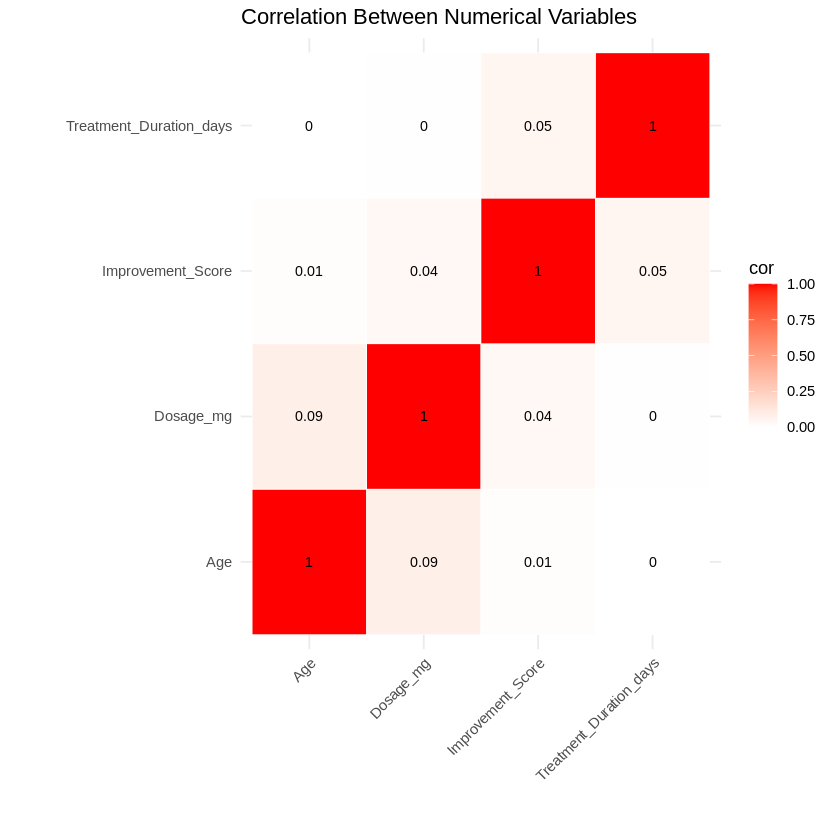

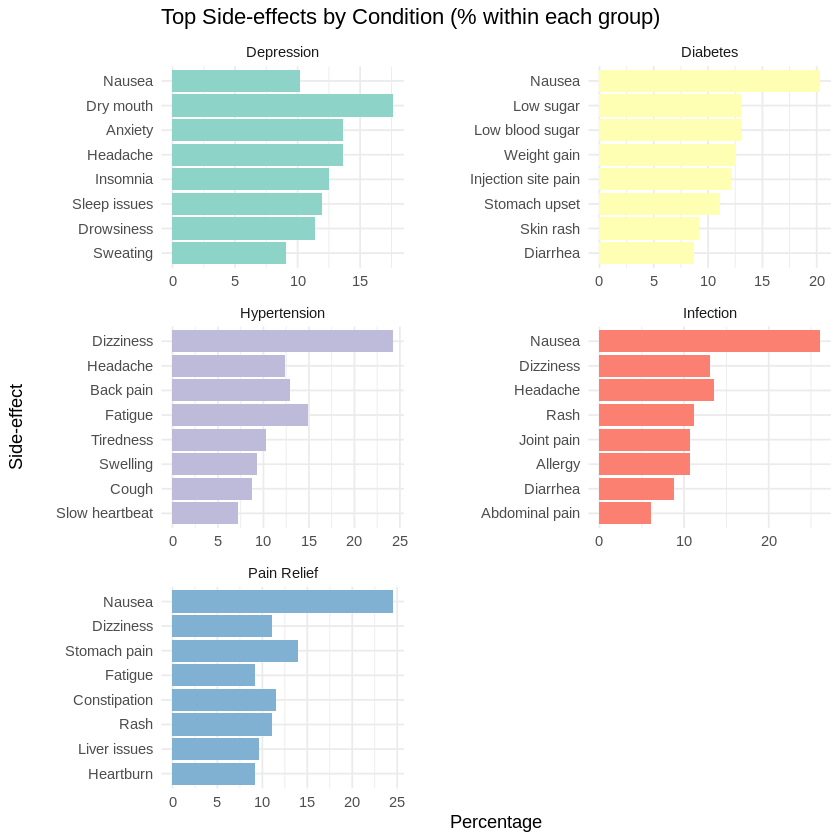

In [39]:
# Heatmap: Correlation between numerical variables
numeric_cols <- df %>% select(Age, Dosage_mg, Treatment_Duration_days, Improvement_Score)
cor_matrix <- cor(numeric_cols, use = "complete.obs")

p3 <- cor_matrix %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(cols = -var1, names_to = "var2", values_to = "cor") %>%
  ggplot(aes(var1, var2, fill = cor)) +
  geom_tile(colour = "white") +
  geom_text(aes(label = round(cor, 2)), size = 3) +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  labs(title = "Correlation Between Numerical Variables",
       x = "", y = "") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggsave("plots/correlation_heatmap.png", p3, width = 8, height = 6)
print(p3)

# Graph: Side-effects by condition
p4 <- df %>%
  count(Condition, Side_Effects) %>%
  group_by(Condition) %>%
  mutate(pct = n / sum(n) * 100) %>%
  ggplot(aes(x = reorder(Side_Effects, pct), y = pct, fill = Condition)) +
  geom_col() +
  coord_flip() +
  facet_wrap(~ Condition, scales = "free", ncol = 2) +
  labs(title = "Top Side-effects by Condition (% within each group)",
       x = "Side-effect", y = "Percentage") +
  scale_fill_brewer(palette = "Set3") +
  theme_minimal() +
  theme(legend.position = "none")

ggsave("plots/side_effects_by_condition.png", p4, width = 14, height = 10)
print(p4)
